# Drill: Prepare Data

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [32]:
#Imports
import numpy as np
import pandas as pd
import math

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

#Winsorizing
import scipy.stats

In [30]:
#Bring in Data
data = pd.read_csv('ny_offenses.csv')
data.head()

,City,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 12
0,Adams Village,"1,861",0,0.0,0,0,0,12,2,10,0,0.0,NaN
1,Addison Town and Village,"2,577",3,0.0,0,0,3,24,3,20,1,0.0,NaN
2,Akron Village,"2,846",3,0.0,0,0,3,16,1,15,0,0.0,NaN
3,Albany,"97,956",791,8.0,30,227,526,"4,090",705,"3,243",142,NaN,NaN
4,Albion Village,"6,388",23,0.0,3,4,16,223,53,165,5,NaN,NaN


In [3]:
#Checking variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                   348 non-null object
Population             348 non-null object
crime          348 non-null object
Murder                 348 non-null float64
Rape                   348 non-null object
Robbery                348 non-null object
assault     348 non-null object
crime         348 non-null object
Burglary               348 non-null object
theft         348 non-null object
theft    348 non-null object
Arson3                 187 non-null float64
Unnamed: 12            0 non-null float64
dtypes: float64(3), object(10)
memory usage: 35.7+ KB


Notice that the Robbery and Burglary are non null objects instead of numerics.

In [6]:
#Create Variables
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    
    return converted
    
def convert_category(number):
    value = convert_number(number)
    
    if value>0:
        return 1
    else:
        return 0
 


In [31]:
data.fillna(0)
data['Population'] = data['Population'].apply(lambda x: convert_number(x))
data['Population Squared'] = data['Population'].apply(lambda x: math.pow(convert_number(x),2))
data['Murder'] = data['Murder'].apply(lambda x: convert_category(x))
data['Robbery'] = data['Robbery'].apply(lambda x: convert_category(x))

## Lets Do some EDA

Population

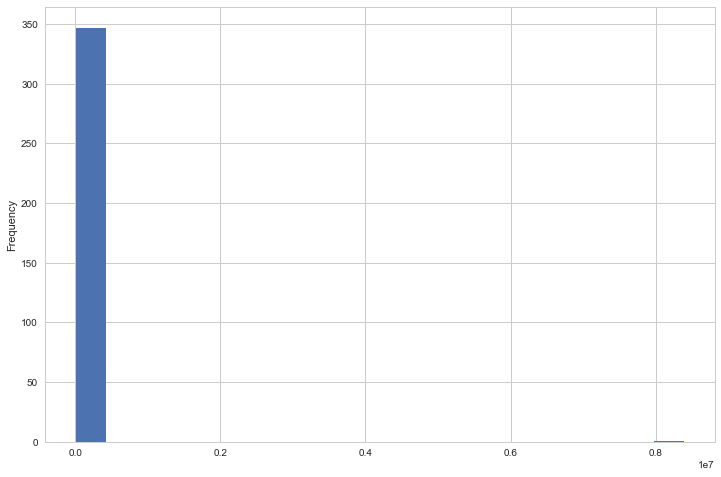

In [22]:
plt.figure(figsize=(12,8))
data['Population'].plot(kind='hist', bins=20)

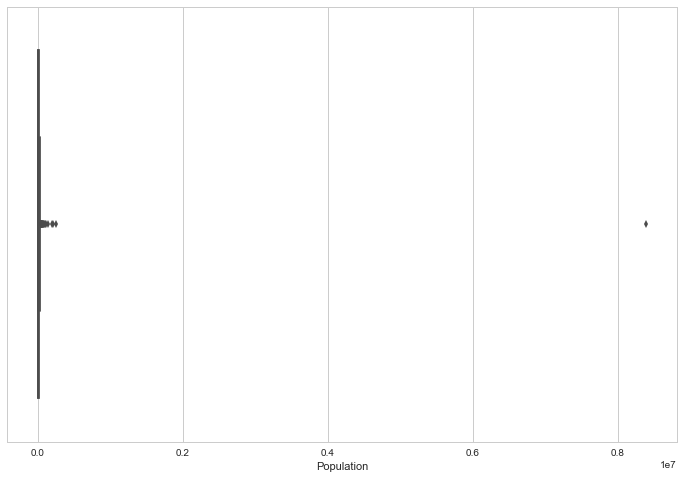

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data['Population'])

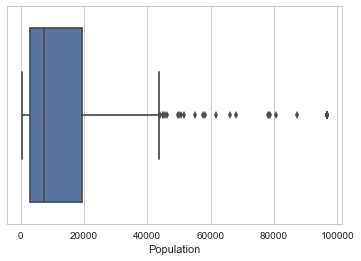

In [33]:
#There is an outlier. Where is it? - Its New Yorrk
#Lets use winsorsie to deal with this.

#Winsorize the values
data['Population'] = scipy.stats.mstats.winsorize(data['Population'], limits=[0,0.03])

sns.boxplot(data['Population'])

In [34]:
#Since updated the population, need to also update population squared
data['Population Squared'] = data['Population'].apply(lambda x: math.pow(convert_number(x),2))

## Pull Out Features

In [35]:
features=data[['Population','Population Squared','Murder','Robbery']]

In [36]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
Population            351 non-null float64
Population Squared    351 non-null float64
Murder                351 non-null int64
Robbery               351 non-null int64
dtypes: float64(2), int64(2)
memory usage: 11.0 KB
